In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import pandas as pd
import tensorflow as tf
from IPython.display import display, Image
import cv2
from PIL import Image
from tqdm import tqdm
from keras.applications.vgg19 import VGG19
# from keras.utils.vis_utils import plot_model
import gc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:

# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/azure.csv')
# df['timestamp'] =  pd.to_datetime(df['timestamp'])
# df = df.set_index('timestamp')
# # df = df.set_index('timestamp')
# df.head()
# df.plot(figsize=(16, 8))
# plt.show()

In [ ]:
# from pandas.core.indexes import multi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import time

DATASET_PATH = '/content/drive/My Drive/Colab Notebooks/Azure_function_invocation/'

csvName = ['33fe3deb029c50d55a33489059339356df43b5078d2ea955572022b644c9caaa', '064a08f4586a62b539042e08348c6ab5d316b51fa5cdc63710490b1e3772c99a',
          '05fcb8cac02e7b214226d379b45dc774a374782f5a953357e5fd53a7a191a82e', '36bc568292ec360f9cc2f4431fa0db953ce8714cdb1b165f4ec68ca54e7fe2be',
          '14456d07da6db5da228beff3ad356f824e4cd09a8d6771089eb26a862526ac9a', 'cd05d7b4445349ee645ea290586fd28c0c675a155eb1522485535c5c0329a908']

# for i in range(len(csvName)):
#   multiSeriesSource = pd.read_csv(DATASET_PATH+csvName[i]+'.csv')
#   print(np.shape(multiSeriesSource))
first_df = pd.read_csv(DATASET_PATH+csvName[0]+ '.csv', usecols=[0])
dfs = [pd.read_csv(DATASET_PATH+filename+'.csv', usecols=range(1, len(pd.read_csv(DATASET_PATH+filename+'.csv').columns))) for filename in csvName]

# Concatenate all DataFrames in the list along columns (axis=1)
big_df = pd.concat([first_df] + dfs, axis=1)

# Display the resulting DataFrame
big_df.head()

# multiSeriesMain_day2 = multiSeriesSource.iloc[1440:2880].reset_index(drop=True)
# multiSeriesMain_day1 = multiSeriesSource.iloc[:1440].reset_index(drop=True)
# multiSeriesMain_day3 = multiSeriesSource.iloc[2880:4320].reset_index(drop=True)

# multiSeriesMain = multiSeriesMain.iloc[:,1:3].T
# print(multiSeriesMain)
# multiSeriesSource

,Unnamed: 0,2c5d363481a100391a50d5397fece786de8d4b86fc02c8880a78bcfa7b297139,4485cb49af9fd55f12a73eaca158f6270667a80e32a24ff85bb24a891f73739f,08f1f04279dfaef5a218be01b28a8bf1b3ccd110c81076c823eb6eba97baa1bd,d510ee451b72401d226dd6c823be29eb106d9b52a989301c08ada5b3ad5413d8,0b457d358285ce6a2337cf4c69d227e8c1e0d6925782c0dc1d876fdef7bf1e06,1e96dba25531d7884b3c21f04badfdd784f86b943fe92058211f18ed087bf15b,9c61f9602abec110d851deb280a65bbd7b2f4916178bacd3d94a477f457565f1,f18abbfa25901bd786c49dec181a29e3c72e3bf9e5983fe7f60380d8f161cbd2,bde06c0fbc47763c3c3612154de4a65e13988a6c8d7e0269baf89148a0fea9fa,cbe29bbb26e04f465c1dee90c41ae7a3ca21aafccdb48d57c8b52752a624bd09,61003f5a331855f0454e64b6d866b112108b5b74a2318ad4c9bf15829323f36f,18d37e2dce6b873df16f8ca72b6d6c17f20a23eedfc8966c6abf1ef80d578aa0,d22521cee1f5ec600b2eed3b158d8ce97ad5bbde4196342c070ce56f5564a48e,4138e785e8ffc3bc0e5e8511fdae49d0f1ff85d4a1766d658e976001b4afa121,e4b0bac1267f21b6a1c7b373c22b1e942fa6c85e3496ceb75201fb615b73cb5d,3bae4006c618c8940c4c5d392b179a158428f05ee8b3113b146c488469bc65aa,5300f81c82aabc5eafcbf34956c04596d8a64327b632ee102d801ed14215848f
0,2021-01-01 00:00:00,251,92,92,11,108,2984,4,7,192,911,300,298,0,0,0,0,0
1,2021-01-01 00:01:00,262,68,72,11,72,14,4,0,187,1208,300,302,0,0,0,0,0
2,2021-01-01 00:02:00,224,41,37,8,293,14,4,0,198,1296,300,300,0,0,0,0,0
3,2021-01-01 00:03:00,215,18,18,10,46,7,2,0,190,1304,300,300,0,0,0,0,0
4,2021-01-01 00:04:00,214,16,16,10,291,77,14,3,183,1102,300,300,0,0,0,0,0


In [ ]:
# plt.plot(big_df.iloc[:, 2])

def chunk_series(series, chunk_size):
    chunks = []
    for i in range(0, len(series), chunk_size):
        chunk = series[i:i+chunk_size]
        chunks.append(chunk)
    return chunks


# Chunk size
chunk_size = 20

# Chunk the series
chunked_data = chunk_series(big_df.iloc[:, 2], chunk_size)
print(np.shape(chunked_data))
# plt.plot(np.transpose(chunked_data[chunked_data < 400]))
df_ch = pd.DataFrame(np.asarray(chunked_data).reshape([1008,20]))

(1008, 20)


In [ ]:
np.std(df_ch, axis =1)

0       18.370901
1       27.651401
2       16.420338
3       11.203125
4        4.313931
          ...    
1003     6.884766
1004     4.505552
1005     7.147552
1006     7.262747
1007    56.495022
Length: 1008, dtype: float64

In [ ]:
! git clone https://github.com/flaviagiammarino/time-gan-tensorflow.git

Cloning into 'time-gan-tensorflow'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 74 (delta 35), reused 41 (delta 16), pack-reused 0
Receiving objects: 100% (74/74), 7.94 MiB | 23.17 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [ ]:
%cd time-gan-tensorflow


/content/time-gan-tensorflow


In [ ]:
data = df_ch

In [ ]:
TRAIN_LENGTH = round(len(data)*0.9)
TEST_LENGTH = len(data) - TRAIN_LENGTH
train = data[0:TRAIN_LENGTH]
test = data[TRAIN_LENGTH : ]
# # train = np.array([np.array(val) for val in train])

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
test_scaled = pd.DataFrame(scaler.fit_transform(test))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = pd.DataFrame(scaler.fit_transform(train))

In [ ]:
np.std(train_scaled, axis =1)

0      0.028745
1      0.042348
2      0.025578
3      0.024357
4      0.013770
         ...   
902    0.034033
903    0.024088
904    0.021309
905    0.020380
906    0.024346
Length: 907, dtype: float64

In [ ]:
def get_real_data(df , seq_len):
    # df = pd.read_hdf(hdf_store, 'data/real').sort_index()

    # Preprocess the dataset:
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    data = []
    for i in range(len(df) - seq_len):
        data.append(scaled_data[i:i + seq_len])
    return data


real_data = get_real_data(train , 140)


In [ ]:
def tstt(train_scaled, seq_len):
  data = []
  for i in range(len(train_scaled) - seq_len):
      data.append(train_scaled[i:i + seq_len])
  return data

In [ ]:
d2t = tstt(np.asarray(train_scaled),140)
np.shape(d2t)

(7636, 140, 3)

In [ ]:
np.shape(train_scaled)
sequences = np.array([train_scaled[t - 30: t] for t in range(30, len(train_scaled) + 30, 30)])
print(np.shape(sequences))

(260,)


<ipython-input-23-5b33b7582ca9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences = np.array([train_scaled[t - 30: t] for t in range(30, len(train_scaled) + 30, 30)])


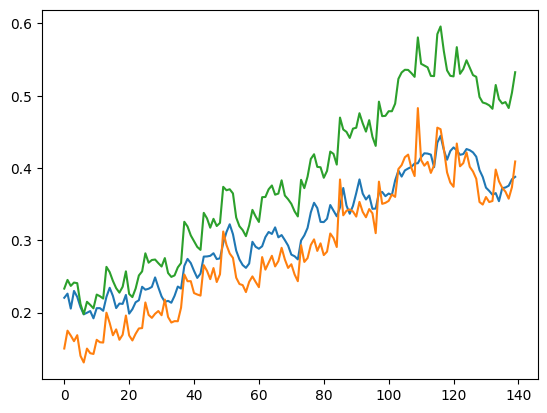

In [ ]:
plt.plot(real_data[7000])

In [ ]:
def time_series_to_sequences(time_series, timesteps):
    '''
    Reshape the time series as sequences.
    '''
    sequences = np.array([time_series[t - timesteps: t] for t in range(timesteps, len(time_series) + timesteps, timesteps)])

    return sequences

x = time_series_to_sequences(time_series=train, timesteps=10)
# xx = time_series_to_sequences(time_series=train, timesteps=20)

<ipython-input-17-a74cafeca720>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences = np.array([time_series[t - timesteps: t] for t in range(timesteps, len(time_series) + timesteps, timesteps)])


In [ ]:
np.shape(x)

(778,)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/subset_300.csv', index_col = None)

In [ ]:
df

,Unnamed: 0,machine_id,time_stamp,cpu_util_percent,mem_util_percent
0,1067642,m_1176,172810.0,29.0,70.0
1,1067814,m_1176,188100.0,59.0,85.0
2,1067986,m_1176,204030.0,48.0,78.0
3,1068158,m_1176,220080.0,40.0,72.0
4,1068330,m_1176,236370.0,62.0,86.0
...,...,...,...,...,...
1202682,1087199,m_765,618150.0,58.0,98.0
1202683,1087371,m_765,634970.0,47.0,87.0
1202684,1087543,m_765,651250.0,50.0,92.0
1202685,1087715,m_765,667840.0,40.0,93.0


In [ ]:
# df = pd.read_csv('subset_300.csv', index_col = None)
df = df[['machine_id' , 'time_stamp' , 'cpu_util_percent']]
tmp = df.groupby('machine_id').count().reset_index()
ids= tmp[tmp['cpu_util_percent']==300]['machine_id']
ids = pd.DataFrame(ids)
df = df.merge(ids, on = 'machine_id')
sorted_df = df.groupby('machine_id').apply(lambda x: x.sort_values('time_stamp')).reset_index(drop=True)
sorted_df['col_index'] = sorted_df.groupby('machine_id').cumcount()

# Pivot the DataFrame
pivot_df = sorted_df.pivot(index='machine_id', columns='col_index', values='cpu_util_percent')
subsample = np.zeros([len(pivot_df) , 30])
for k in range(len(pivot_df)):
    for i in range(30):
        tmp = []
        for j in np.arange(i , i+10, 30):
            tmp.append(pivot_df.iloc[k , j])

        subsample[k , i] = np.mean(tmp)
result = np.reshape(subsample , (len(subsample) , 30 ,1))

In [ ]:
np.shape(subsample)

(3240, 30)

In [ ]:
np.shape(subsample)

In [ ]:
def train_generator(dataset, n_lags=1):
    dataX = []
    for i in range(len(dataset)- n_lags -1):
        a = dataset.iloc[i:(i+n_lags)].to_numpy()
        dataX.append(a)
        # dataY.append(dataset.iloc[i + n_lags].to_numpy())
    return (np.array(dataX))

In [ ]:
TIME_STEPS = 140
X_train = train_generator(train_scaled, n_lags = TIME_STEPS)

NameError: name 'train_scaled' is not defined

In [ ]:
real_data = pd.DataFrame(real_data[:][:][0])

In [ ]:
train = pd.DataFrame(train)

In [ ]:
real_data =np.asarray(real_data)

In [ ]:
from pandas.core.common import flatten
real_data = real_data.apply(lambda x: pd.Series(flatten(x)))

In [ ]:
real_data

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.228259,0.202280,0.211982,0.180873,0.180684,0.185664,0.172820,0.150183,0.145985,0.147116,...,0.163486,0.129767,0.126641,0.108724,0.136012,0.130614,0.121914,0.120668,0.157459,0.133791
1,0.202280,0.211982,0.180873,0.180684,0.185664,0.172820,0.150183,0.145985,0.147116,0.141632,...,0.129767,0.126641,0.108724,0.136012,0.130614,0.121914,0.120668,0.157459,0.133791,0.151214
2,0.211982,0.180873,0.180684,0.185664,0.172820,0.150183,0.145985,0.147116,0.141632,0.174637,...,0.126641,0.108724,0.136012,0.130614,0.121914,0.120668,0.157459,0.133791,0.151214,0.156211
3,0.180873,0.180684,0.185664,0.172820,0.150183,0.145985,0.147116,0.141632,0.174637,0.145929,...,0.108724,0.136012,0.130614,0.121914,0.120668,0.157459,0.133791,0.151214,0.156211,0.162674
4,0.180684,0.185664,0.172820,0.150183,0.145985,0.147116,0.141632,0.174637,0.145929,0.138606,...,0.136012,0.130614,0.121914,0.120668,0.157459,0.133791,0.151214,0.156211,0.162674,0.148076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,0.257530,0.249364,0.244701,0.245003,0.241613,0.241833,0.258950,0.257999,0.253302,0.251723,...,0.268072,0.254482,0.254907,0.238394,0.231832,0.234823,0.226219,0.223344,0.228365,0.223876
7632,0.249364,0.244701,0.245003,0.241613,0.241833,0.258950,0.257999,0.253302,0.251723,0.259981,...,0.254482,0.254907,0.238394,0.231832,0.234823,0.226219,0.223344,0.228365,0.223876,0.215846
7633,0.244701,0.245003,0.241613,0.241833,0.258950,0.257999,0.253302,0.251723,0.259981,0.268075,...,0.254907,0.238394,0.231832,0.234823,0.226219,0.223344,0.228365,0.223876,0.215846,0.211804
7634,0.245003,0.241613,0.241833,0.258950,0.257999,0.253302,0.251723,0.259981,0.268075,0.281646,...,0.238394,0.231832,0.234823,0.226219,0.223344,0.228365,0.223876,0.215846,0.211804,0.224070


In [ ]:
d2t = np.asarray(d2t)
d2t.shape[0]

7636

In [ ]:
f2t = np.reshape(d2t , (d2t.shape[0]*d2t.shape[1] , d2t.shape[2]))

In [ ]:
df_ch[:900]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,92,68,41,18,16,21,24,24,24,20,24,23,30,24,19,16,30,27,15,22
1,17,22,19,23,30,17,30,108,41,52,72,62,18,9,26,13,12,62,53,94
2,41,43,34,35,40,33,32,31,112,46,43,43,38,38,38,41,46,42,45,46
3,44,38,40,47,35,40,77,55,50,63,55,54,55,62,67,55,62,59,71,65
4,54,55,53,46,59,60,54,54,57,54,55,58,49,60,49,46,51,48,53,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,76,72,82,69,63,66,70,70,69,71,62,69,68,74,77,73,81,75,74,74
896,75,77,72,74,72,74,75,75,75,69,69,68,59,65,59,64,61,63,63,63
897,62,58,51,53,52,55,54,55,57,58,56,62,55,63,59,64,63,64,60,61
898,188,203,211,203,129,66,62,66,59,64,58,58,60,65,65,65,62,66,66,67


In [ ]:
df_ch

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,92,68,41,18,16,21,24,24,24,20,24,23,30,24,19,16,30,27,15,22
1,17,22,19,23,30,17,30,108,41,52,72,62,18,9,26,13,12,62,53,94
2,41,43,34,35,40,33,32,31,112,46,43,43,38,38,38,41,46,42,45,46
3,44,38,40,47,35,40,77,55,50,63,55,54,55,62,67,55,62,59,71,65
4,54,55,53,46,59,60,54,54,57,54,55,58,49,60,49,46,51,48,53,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,24,23,31,30,20,13,14,16,19,12,14,8,1,10,13,15,12,14,16,15
1004,16,18,19,11,13,10,11,12,23,19,19,13,13,9,7,11,13,9,8,6
1005,6,10,13,11,14,13,12,6,6,6,0,0,0,22,17,20,14,22,9,24
1006,18,11,13,23,15,22,15,14,11,19,10,10,12,11,14,12,12,13,13,43


In [ ]:
def time_series_to_sequences(time_series, timesteps):
    '''
    Reshape the time series as sequences.
    '''
    sequences = np.array([time_series[t - timesteps: t] for t in range(timesteps, len(time_series) + timesteps, timesteps)])
    return sequences

# x = np.transpose(np.asarray(x_train))
x = np.asarray(x_train)
x = x - np.mean(x , axis = 0)/np.std(x , axis = 0)
x = time_series_to_sequences(time_series=x, timesteps=20)
print((x[0,:].shape))

<ipython-input-62-ee94cb0ae6b0>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences = np.array([time_series[t - timesteps: t] for t in range(timesteps, len(time_series) + timesteps, timesteps)])


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
model = TimeGAN(
    x=(np.transpose(np.array(df_ch))),
    timesteps=20,
    hidden_dim=64,
    num_layers=3,
    lambda_param=0.1,
    eta_param=10,
    learning_rate=0.001,
    batch_size=16
)

In [ ]:
x=(np.transpose(np.array(df_ch)))

In [ ]:
np.shape(np.std(x, axis =0))

(1008,)

In [ ]:
y = np.transpose(np.array(df_ch))

In [ ]:
np.transpose(np.array(df_ch))

array([[ 92,  17,  41, ...,   6,  18, 123],
       [ 68,  22,  43, ...,  10,  11, 119],
       [ 41,  19,  34, ...,  13,  13, 122],
       ...,
       [ 27,  62,  42, ...,  22,  13,  34],
       [ 15,  53,  45, ...,   9,  13,  27],
       [ 22,  94,  46, ...,  24,  43,  29]])

In [ ]:
samples = (np.transpose(np.array(df_ch))).shape[0]

# extract the number of time series
features = (np.transpose(np.array(df_ch))).shape[1]

# scale the time series
mu = np.mean((np.transpose(np.array(df_ch))), axis=0)
sigma = np.std((np.transpose(np.array(df_ch))), axis=0)
sigma
# mu
# y = (y - mu) / sigma

array([18.3709009 , 27.65140141, 16.420338  , ...,  7.14755203,
        7.26274741, 56.4950219 ])

In [ ]:
df_ch.iloc[792]

0     33
1     23
2     22
3     22
4     31
5     25
6     24
7     21
8     23
9     70
10    33
11    31
12    43
13    97
14    52
15    44
16    43
17    38
18    32
19    37
Name: 795, dtype: int64

In [ ]:
df_ch = df_ch.loc[~(df_ch == 0).all(axis = 1)]
# df.loc[~(df==0).all(axis=1)]


In [ ]:
tmp = pd.DataFrame((y - mu)/sigma)
tmp.isna().any()[lambda x: x]

NameError: name 'y' is not defined

In [ ]:
y[:,792]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import numpy as np

from time_gan_tensorflow.model import TimeGAN
from time_gan_tensorflow.plots import plot
model = TimeGAN(
    np.transpose(np.array(df_ch)),
    timesteps=20,
    hidden_dim=64,
    num_layers=3,
    lambda_param=0.1,
    eta_param=10,
    learning_rate=0.001,
    batch_size=16
)

model.fit(
    epochs=2,
    verbose=True
)

epoch: 1 autoencoder_loss: 1005.922668 generator_loss: 30.645258 discriminator_loss: 2.876896
epoch: 2 autoencoder_loss: 1004.437012 generator_loss: 27.686459 discriminator_loss: 2.710580


In [ ]:
np.shape(df_ch[900:])

(105, 20)

In [ ]:
##### Sofar the best setting

import numpy as np

from time_gan_tensorflow.model import TimeGAN
from time_gan_tensorflow.plots import plot

# Generate the data
N = 50      # number of time series
L = 1000    # length of each time series
t = np.linspace(0, 1, L).reshape(-1, 1)
c = np.cos(2 * np.pi * (50 * t - 0.5))
s = np.sin(2 * np.pi * (100 * t - 0.5))
x = 5 + 10 * c + 10 * s + 5 * np.random.normal(size=(L, N))

# TRAIN_LENGTH = round(len(x)*0.8)
# TEST_LENGTH = len(x) - TRAIN_LENGTH
# # train = x.iloc[0:TRAIN_LENGTH]
# # test = x[TRAIN_LENGTH : ]
# # # train = np.asarray(train).astype(np.float32)
# # # test= np.asarray(test).astype(np.float32)
# # # Split the data
# x_train, x_test = x[:int(0.8 * L)], x[int(0.8 * L):]
# x_train = np.array(train)
# Fit the model to the training data
model = TimeGAN(
    np.transpose(np.array(df_ch[:900])),
    timesteps=20,
    hidden_dim=32,
    num_layers=3,
    lambda_param=0.1,
    eta_param=10,
    learning_rate=0.001,
    batch_size=16
)


model.fit(
    epochs=500,
    verbose=True
)

# Reconstruct the test data
# x_hat = model.reconstruct(x=np.array(x_test))

# # Generate the synthetic data
# x_sim = model.simulate(samples=len(np.array(test_scaled)))

# # Plot the actual, reconstructed and synthetic data
# fig = plot(actual=np.array(test_scaled), reconstructed=x_hat, synthetic=x_sim)
# fig.write_image('results.png', scale=4, height=900, width=700)

epoch: 1 autoencoder_loss: 900.645203 generator_loss: 24.680389 discriminator_loss: 2.716217
epoch: 2 autoencoder_loss: 899.639648 generator_loss: 20.492855 discriminator_loss: 2.553706
epoch: 3 autoencoder_loss: 898.782837 generator_loss: 21.199184 discriminator_loss: 2.440752
epoch: 4 autoencoder_loss: 897.600159 generator_loss: 22.303135 discriminator_loss: 2.502981
epoch: 5 autoencoder_loss: 896.094055 generator_loss: 24.903847 discriminator_loss: 2.543382
epoch: 6 autoencoder_loss: 894.040161 generator_loss: 29.419992 discriminator_loss: 2.009303
epoch: 7 autoencoder_loss: 891.351929 generator_loss: 34.225693 discriminator_loss: 2.259449
epoch: 8 autoencoder_loss: 888.041870 generator_loss: 39.816017 discriminator_loss: 2.172416
epoch: 9 autoencoder_loss: 884.057678 generator_loss: 45.412571 discriminator_loss: 2.029989
epoch: 10 autoencoder_loss: 879.367920 generator_loss: 50.857410 discriminator_loss: 1.893516
epoch: 11 autoencoder_loss: 873.907227 generator_loss: 56.089378 disc

In [ ]:
# x_hat = model.reconstruct(x=np.array(test))

# Generate the synthetic data
# x_sim = model.simulate(samples=(df_ch.shape[1]))

# Plot the actual, reconstructed and synthetic data
# fig = plot(actual=np.array(test_scaled), reconstructed=x_hat, synthetic=x_sim)
# fig.write_image('results.png', scale=4, height=900, width=700)

x_sim = (model.simulate(samples=len(np.transpose(np.array(df_ch[900:])))))

In [ ]:
len(np.transpose(np.array(df_ch[900:])))

20

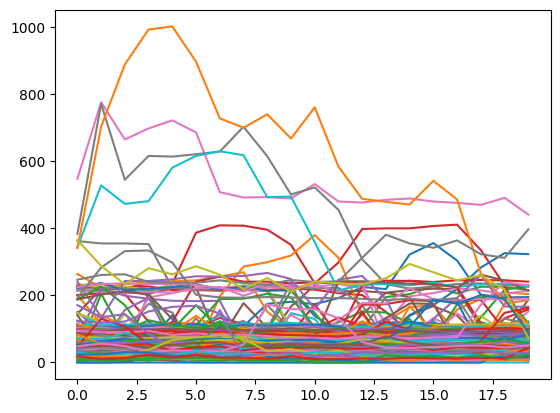

In [ ]:
plt.plot(np.transpose(np.array(df_ch[700:])))

In [ ]:
np.shape(x_sim)

(20, 900)

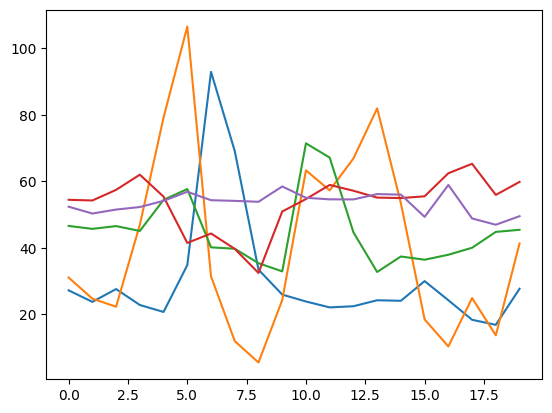

In [ ]:
plt.plot(x_sim[:,:5])

In [ ]:
pd.DataFrame(x_sim).to_csv('/content/drive/My Drive/Colab Notebooks/Azure_function_invocation/x_sim.csv')

In [ ]:
pd.DataFrame(x_sim)

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,27.189975,31.044913,46.556506,54.422874,52.343097,46.405865,42.769571,40.412253,40.041235,39.862060,...,84.287608,81.553181,72.473287,67.127320,59.614362,90.619606,65.142387,65.319312,78.490987,95.321525
1,23.736533,24.687799,45.684987,54.216149,50.290797,44.908974,40.637276,38.981276,39.369648,47.160862,...,82.597758,80.962972,72.686997,66.091693,60.990545,82.127055,64.103531,66.509952,79.546382,93.396830
2,27.584038,22.277224,46.513201,57.410943,51.482172,44.140379,43.510092,38.989328,40.088980,40.632015,...,80.076276,85.504743,76.445044,64.005336,61.437063,75.492093,60.006450,66.661486,85.877726,89.880449
3,22.790447,46.889465,45.049390,61.967904,52.244673,46.167676,41.202427,39.211951,40.926477,37.539414,...,79.882448,77.125538,73.768967,65.225837,60.129489,74.770798,60.600610,66.808988,93.053494,89.274516
4,20.696768,79.175369,54.403612,55.365604,54.111954,45.019013,40.875227,43.393403,42.042414,44.221162,...,78.853812,71.584442,72.686391,67.053997,59.251482,101.022937,63.322479,64.231382,88.752666,93.054686
5,34.784322,106.531721,57.646893,41.455058,56.830870,45.405423,42.121619,46.181237,41.429051,48.662718,...,80.654304,76.454416,70.924757,70.853814,60.713398,142.045801,65.527498,57.644867,89.600974,116.327389
6,92.893343,31.375379,40.128035,44.290947,54.296372,45.628747,41.083354,44.792301,37.164628,33.301734,...,84.560513,71.418264,73.753552,75.910351,61.954046,198.335904,70.176711,53.074442,71.502268,144.362279
7,69.060114,11.930195,39.703024,39.668536,54.099027,50.462175,45.638411,45.331661,37.088214,29.539867,...,91.390487,72.238033,74.658298,76.932124,57.067359,212.561961,72.240150,55.796001,66.386538,109.397712
8,33.418669,5.508085,35.357734,32.424510,53.823657,50.478327,51.832572,44.084336,42.205929,24.902338,...,90.787625,77.848042,68.454180,74.409514,53.414034,175.211796,70.483014,51.394680,64.160503,97.010091
9,25.917612,24.257142,32.903239,50.904418,58.432381,56.345459,44.527017,44.502417,39.990193,28.914721,...,93.309374,83.503077,67.496650,75.182487,55.518365,71.450323,69.896535,59.805972,66.036686,89.184807


In [ ]:
N = 50      # number of time series
L = 1000    # length of each time series
t = np.linspace(0, 1, L).reshape(-1, 1)
c = np.cos(2 * np.pi * (50 * t - 0.5))
s = np.sin(2 * np.pi * (100 * t - 0.5))
x = 5 + 10 * c + 10 * s + 5 * np.random.normal(size=(L, N))

# Split the data
x_train, x_test = x[:int(0.8 * L)], x[int(0.8 * L):]
np.shape(x_test)
# np.shape(test_scaled)

(200, 50)

In [ ]:
x_train

array([[ -5.95520363,  -2.31179579,  -3.07002604, ...,   1.14343613,
         -2.34558441, -11.61208868],
       [-10.13058187, -12.89934821, -23.81832845, ..., -23.6441225 ,
        -14.59972541, -16.65815209],
       [-13.15899757, -13.28930331, -13.81678358, ...,  -1.47758978,
        -14.94997897, -16.72872012],
       ...,
       [  3.10474856,  10.46986303,  -0.12815849, ...,   0.759635  ,
         11.23170754,   3.68952715],
       [  9.37599864,   2.03502573,   5.04415359, ...,   0.68113501,
          2.17557538,  11.17195083],
       [ -5.87310524,   0.97484212,   2.30121361, ...,  -4.11257068,
         -4.56650272,  -5.68480608]])

In [ ]:
np.shape(np.array(train_scaled))

(907, 20)

AttributeError: 'TimeGAN' object has no attribute 'TimeGAN'

In [ ]:
# x_hat = model.reconstruct(x=np.asarray(test_scaled))
x_sim = model.simulate(samples=len(np.array(test_scaled)))
fig = plot(actual=np.array(test_scaled[:70]), reconstructed=np.array(test_scaled)[:70], synthetic=x_sim[:70])
fig.show()

In [ ]:
np.save( '/content/drive/My Drive/Colab Notebooks/test_azure_timegan_new_140.npy', test_scaled)
# np.save('/content/drive/My Drive/Colab Notebooks/x_hat_azure.npy', x_hat )
np.save( '/content/drive/My Drive/Colab Notebooks/x_sim_azure_timegan_new_140.npy', x_sim)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/subset_300.csv', index_col = None)
df = df[['machine_id' , 'time_stamp' , 'cpu_util_percent']]
tmp = df.groupby('machine_id').count().reset_index()
ids= tmp[tmp['cpu_util_percent']==300]['machine_id']
ids = pd.DataFrame(ids)
df = df.merge(ids, on = 'machine_id')
sorted_df = df.groupby('machine_id').apply(lambda x: x.sort_values('time_stamp')).reset_index(drop=True)
sorted_df['col_index'] = sorted_df.groupby('machine_id').cumcount()

# Pivot the DataFrame
pivot_df = sorted_df.pivot(index='machine_id', columns='col_index', values='cpu_util_percent')
# subsample = np.zeros([len(pivot_df) , 10,30])
# for k in range(len(pivot_df)):
#   for i in range(30):
#     tmp = []
#     for j in range(i , i+30):
#       subsample.append(pivot_df.iloc[k , i:i+30])
#       # tmp.append(pivot_df.iloc[k , j])

#     # subsample[k , i] = np.mean(tmp)
# # result = np.reshape(subsample , (len(subsample) , 30 ,1))



In [ ]:
agg_alibaba = pd.read_csv('/content/drive/My Drive/Colab Notebooks/alibaba_machine.csv', index_col = 0)


In [ ]:
def break_scale(data, seq_length):
  broke = np.asarray(data).reshape(-1, seq_length)  # This will reshape the data to (3240 * 10, 30)
  scaler = MinMaxScaler(feature_range=(0, 1))
  broke = pd.DataFrame(scaler.fit_transform(broke))
  return broke

In [ ]:
agg_alibaba_30 = break_scale(agg_alibaba, 70)

In [ ]:
ab300_135 = break_scale(pivot_df,135)


In [ ]:
np.shape(test)

(610, 30)

In [ ]:
TRAIN_LENGTH = round(len(agg_alibaba_30)*0.9)
TEST_LENGTH = len(agg_alibaba_30) - TRAIN_LENGTH
train = agg_alibaba_30[0:TRAIN_LENGTH]
test = agg_alibaba_30[TRAIN_LENGTH : ]

In [ ]:
d2t = np.asarray(train)
f2t = np.reshape(d2t , (d2t.shape[0]*d2t.shape[1] ,1 ))

In [ ]:
np.shape(f2t)

(164820, 1)

In [ ]:
d2tt = np.asarray(test)

f2tt = np.reshape(d2tt , (d2tt.shape[0]*d2tt.shape[1] ,1 ))

In [ ]:
np.shape(f2tt)

(18300, 1)

In [ ]:
N = 50      # number of time series
L = 1000    # length of each time series
t = np.linspace(0, 1, L).reshape(-1, 1)
c = np.cos(2 * np.pi * (50 * t - 0.5))
s = np.sin(2 * np.pi * (100 * t - 0.5))
x = 5 + 10 * c + 10 * s + 5 * np.random.normal(size=(L, N))

# TRAIN_LENGTH = round(len(df)*0.8)
# TEST_LENGTH = len(df) - TRAIN_LENGTH
# train = df.iloc[0:TRAIN_LENGTH]
# test = df[TRAIN_LENGTH : ]
# train = np.asarray(train).astype(np.float32)
# test= np.asarray(test).astype(np.float32)
# Split the data
x_train, x_test = x[:int(0.8 * L)], x[int(0.8 * L):]
# x_train = np.array(train)
# Fit the model to the training data

In [ ]:
np.shape(x_test)

(200, 50)

In [ ]:
N = 50      # number of time series
L = 1000    # length of each time series
t = np.linspace(0, 1, L).reshape(-1, 1)
c = np.cos(2 * np.pi * (50 * t - 0.5))
s = np.sin(2 * np.pi * (100 * t - 0.5))
x = 5 + 10 * c + 10 * s + 5 * np.random.normal(size=(L, N))

# Split the data
x_train, x_test = x[:int(0.8 * L)], x[int(0.8 * L):]

# Fit the model to the training data
model = TimeGAN(
    x=x_train,
    timesteps=20,
    hidden_dim=64,
    num_layers=3,
    lambda_param=0.1,
    eta_param=10,
    learning_rate=0.001,
    batch_size=16
)

model.fit(
    epochs=500,
    verbose=True
)

(800, 50)

In [ ]:
model = TimeGAN(
    x=x,
    timesteps=20,
    hidden_dim=64,
    num_layers=3,
    lambda_param=0.1,
    eta_param=10,
    learning_rate=0.001,
    batch_size=16
)

model.fit(
    epochs=2,
    verbose=True
)

epoch: 1 autoencoder_loss: 49.217384 generator_loss: 10.111492 discriminator_loss: 2.369674
epoch: 2 autoencoder_loss: 48.514000 generator_loss: 21.764450 discriminator_loss: 1.424168


In [ ]:
import numpy as np

from time_gan_tensorflow.model import TimeGAN
from time_gan_tensorflow.plots import plot

# Generate the data
N = 50      # number of time series
L = 1000    # length of each time series
t = np.linspace(0, 1, L).reshape(-1, 1)
c = np.cos(2 * np.pi * (50 * t - 0.5))
s = np.sin(2 * np.pi * (100 * t - 0.5))
x = 5 + 10 * c + 10 * s + 5 * np.random.normal(size=(L, N))

# TRAIN_LENGTH = round(len(df)*0.8)
# TEST_LENGTH = len(df) - TRAIN_LENGTH
# train = df.iloc[0:TRAIN_LENGTH]
# test = df[TRAIN_LENGTH : ]
# # train = np.asarray(train).astype(np.float32)
# # test= np.asarray(test).astype(np.float32)
# # Split the data
# x_train, x_test = train_scaled[:int(0.8 * L)], train_scaled[int(0.8 * L):]
# x_train = np.array(train)
# Fit the model to the training data
model = TimeGAN(
    x=np.asarray(f2t),
    timesteps=30,
    hidden_dim=20,
    num_layers=2,
    lambda_param=0.1,
    eta_param=10,
    learning_rate=0.001,
    batch_size=64
)

model.fit(
    epochs=00,
    verbose=True
)

# Reconstruct the test data
# x_hat = model.reconstruct(x=np.array(test))

# Generate the synthetic data
x_sim = model.simulate(samples=len(np.array(f2tt[:9720])))

# Plot the actual, reconstructed and synthetic data
fig = plot(actual=np.array(test), reconstructed=x_sim, synthetic=x_sim)
# fig.write_image('results.png', scale=4, height=900, width=700)

epoch: 1 autoencoder_loss: 0.037656 generator_loss: 5.046260 discriminator_loss: 1.978979
epoch: 2 autoencoder_loss: 0.015501 generator_loss: 4.263459 discriminator_loss: 1.788659
epoch: 3 autoencoder_loss: 0.008368 generator_loss: 4.085195 discriminator_loss: 1.478947
epoch: 4 autoencoder_loss: 0.012701 generator_loss: 3.317905 discriminator_loss: 2.155072
epoch: 5 autoencoder_loss: 0.006052 generator_loss: 4.682051 discriminator_loss: 1.656168
epoch: 6 autoencoder_loss: 0.004270 generator_loss: 5.492917 discriminator_loss: 1.510370
epoch: 7 autoencoder_loss: 0.003890 generator_loss: 5.618325 discriminator_loss: 1.368699
epoch: 8 autoencoder_loss: 0.003157 generator_loss: 5.233628 discriminator_loss: 1.382404
epoch: 9 autoencoder_loss: 0.002998 generator_loss: 6.553433 discriminator_loss: 1.314168
epoch: 10 autoencoder_loss: 0.002955 generator_loss: 5.747547 discriminator_loss: 1.407862
epoch: 11 autoencoder_loss: 0.002278 generator_loss: 5.348847 discriminator_loss: 1.615038
epoch: 1

In [ ]:
# x_sim = model.simulate(samples=len(np.array(f2tt[:1000])))
fig = plot(actual=np.array(f2tt[:200]), reconstructed=x_sim[:200], synthetic=x_sim[:200])


In [ ]:
fig.show()

In [ ]:
np.save( '/content/drive/My Drive/Colab Notebooks/test_alibaba17_timegan_new_30.npy', test)
# np.save('/content/drive/My Drive/Colab Notebooks/x_hat_azure.npy', x_hat )
np.save( '/content/drive/My Drive/Colab Notebooks/x_sim_alibaba17_timegan_new_30.npy', x_sim)

In [ ]:
TRAIN_LENGTH = round(len(subsample)*0.8)
TEST_LENGTH = len(subsample) - TRAIN_LENGTH
train = subsample[0:TRAIN_LENGTH]
test = subsample[TRAIN_LENGTH : ]

In [ ]:
np.shape(train)

(2592, 30)

In [ ]:
import numpy as np

from time_gan_tensorflow.model import TimeGAN
from time_gan_tensorflow.plots import plot
model = TimeGAN(
    x=train,
    timesteps=11,
    hidden_dim=64,
    num_layers=2,
    lambda_param=0.1,
    eta_param=10,
    learning_rate=0.001,
    batch_size=16
)

model.fit(
    epochs=500,
    verbose=True
)

# Reconstruct the test data
x_hat = model.reconstruct(x=np.array(test))

# Generate the synthetic data
x_sim = model.simulate(samples=len(np.array(test)))

# Plot the actual, reconstructed and synthetic data
fig = plot(actual=np.array(test), reconstructed=x_hat, synthetic=x_sim)

epoch: 1 autoencoder_loss: 154.774506 generator_loss: 54.636772 discriminator_loss: 2.721395
epoch: 2 autoencoder_loss: 113.114349 generator_loss: 67.818474 discriminator_loss: 2.468282
epoch: 3 autoencoder_loss: 120.445892 generator_loss: 55.384220 discriminator_loss: 2.041785
epoch: 4 autoencoder_loss: 112.873383 generator_loss: 50.503963 discriminator_loss: 1.901916
epoch: 5 autoencoder_loss: 88.689865 generator_loss: 59.254353 discriminator_loss: 1.476924
epoch: 6 autoencoder_loss: 82.383675 generator_loss: 52.682117 discriminator_loss: 1.205153
epoch: 7 autoencoder_loss: 89.813568 generator_loss: 54.245720 discriminator_loss: 1.043231
epoch: 8 autoencoder_loss: 94.017075 generator_loss: 49.161793 discriminator_loss: 1.702595
epoch: 9 autoencoder_loss: 82.934258 generator_loss: 48.203033 discriminator_loss: 2.215601
epoch: 10 autoencoder_loss: 79.720108 generator_loss: 35.298752 discriminator_loss: 1.536885
epoch: 11 autoencoder_loss: 102.305550 generator_loss: 42.693752 discrimina

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
x_sim = model.simulate(samples=len(np.array(test)))
fig = plot(actual=np.array(test), reconstructed=x_sim, synthetic=x_sim)

In [ ]:
fig.show()

In [ ]:
np.save( '/content/drive/My Drive/Colab Notebooks/test_alibaba17_timegan.npy', test)
# np.save('/content/drive/My Drive/Colab Notebooks/x_hat_alibaba_2018.npy', x_hat )
np.save( '/content/drive/My Drive/Colab Notebooks/x_sim_alibababa2018_timegan.npy', x_sim)

In [ ]:
  agg_alibaba = pd.read_csv('/content/drive/My Drive/Colab Notebooks/alibaba_machine.csv', index_col = 0)
  result = np.reshape(np.asarray(agg_alibaba) , (np.shape(agg_alibaba)[0] , np.shape(agg_alibaba)[1]))

In [ ]:
agg_alibaba = np.asarray(agg_alibaba)

In [ ]:
np.shape(agg_alibaba)

(1308, 140)

In [ ]:
TRAIN_LENGTH = round(len(agg_alibaba)*0.9)
TEST_LENGTH = len(agg_alibaba) - TRAIN_LENGTH
train = agg_alibaba[0:TRAIN_LENGTH]
test = agg_alibaba[TRAIN_LENGTH : ]

In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
test_azure = np.load( '/content/drive/My Drive/Colab Notebooks/test_azure.npy')
x_hat_azure = np.load('/content/drive/My Drive/Colab Notebooks/x_hat_azure.npy')
sim_azure = np.load( '/content/drive/My Drive/Colab Notebooks/x_sim_azure.npy')

In [ ]:
print(np.shape(test_azure))
print(np.shape(sim_azure))
print(np.shape(x_hat_azure))

(1728, 3)
(648, 30)
(648, 30)


In [ ]:
# tsne_result = pd.DataFrame(tsne_result, columns=['X', 'Y']).assign(Data='Real')
# tsne_result.loc[len(test_2018):, 'Data'] = 'Synthetic'
# pca = PCA(n_components=2)
# pca.fit(test_azure)
# pca_real = (pd.DataFrame(pca.transform(test_azure))
#             .assign(Data='Real'))
# pca_synthetic = (pd.DataFrame(pca.transform(sim_azure))
#                  .assign(Data='Synthetic'))
# pca_result = pca_real.append(pca_synthetic).rename(
#     columns={0: '1st Component', 1: '2nd Component'})
tsne_data = np.concatenate((test_azure,
                            sim_azure), axis=0)

tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=40)
tsne_result = tsne.fit_transform(tsne_data)
tsne_result = pd.DataFrame(tsne_result, columns=['X', 'Y']).assign(Data='Real')
tsne_result.loc[len(test_2018):, 'Data'] = 'Synthetic'

ValueError: ignored

In [ ]:
np.shape(test_azure)

(262, 140)

In [ ]:
test_2018 = np.load( '/content/drive/My Drive/Colab Notebooks/test_alibaba_2018.npy')
# np.save('/content/drive/My Drive/Colab Notebooks/x_hat_alibaba_2018.npy', x_hat )
sim_2018 = np.load( '/content/drive/My Drive/Colab Notebooks/x_sim_alibababa_2018.npy')

In [ ]:
pca = PCA(n_components=2)
pca.fit(test_2018)
pca_real = (pd.DataFrame(pca.transform(test_2018))
            .assign(Data='Real'))
pca_synthetic = (pd.DataFrame(pca.transform(sim_2018))
                 .assign(Data='Synthetic'))
pca_result = pca_real.append(pca_synthetic).rename(
    columns={0: '1st Component', 1: '2nd Component'})

<ipython-input-210-d418c9774ebe>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
tsne_data = np.concatenate((test_2018,
                            sim_2018), axis=0)

tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=45)
tsne_result = tsne.fit_transform(tsne_data)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 1296 samples in 0.001s...
[t-SNE] Computed neighbors for 1296 samples in 0.231s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1296
[t-SNE] Computed conditional probabilities for sample 1296 / 1296
[t-SNE] Mean sigma: 17.220933
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.364441
[t-SNE] KL divergence after 1000 iterations: 0.934633


In [ ]:
tsne_result = pd.DataFrame(tsne_result, columns=['X', 'Y']).assign(Data='Real')
tsne_result.loc[len(test_2018):, 'Data'] = 'Synthetic'

In [ ]:
tsne_result

,X,Y,Data
0,2.420464,2.269438,Real
1,-2.511158,-2.880859,Real
2,-4.732145,8.527477,Real
3,-4.216275,2.562119,Real
4,-0.787485,-1.829965,Real
...,...,...,...
1291,-8.585426,-24.731880,Synthetic
1292,14.166675,6.885098,Synthetic
1293,17.558447,22.339529,Synthetic
1294,11.099851,-17.964115,Synthetic


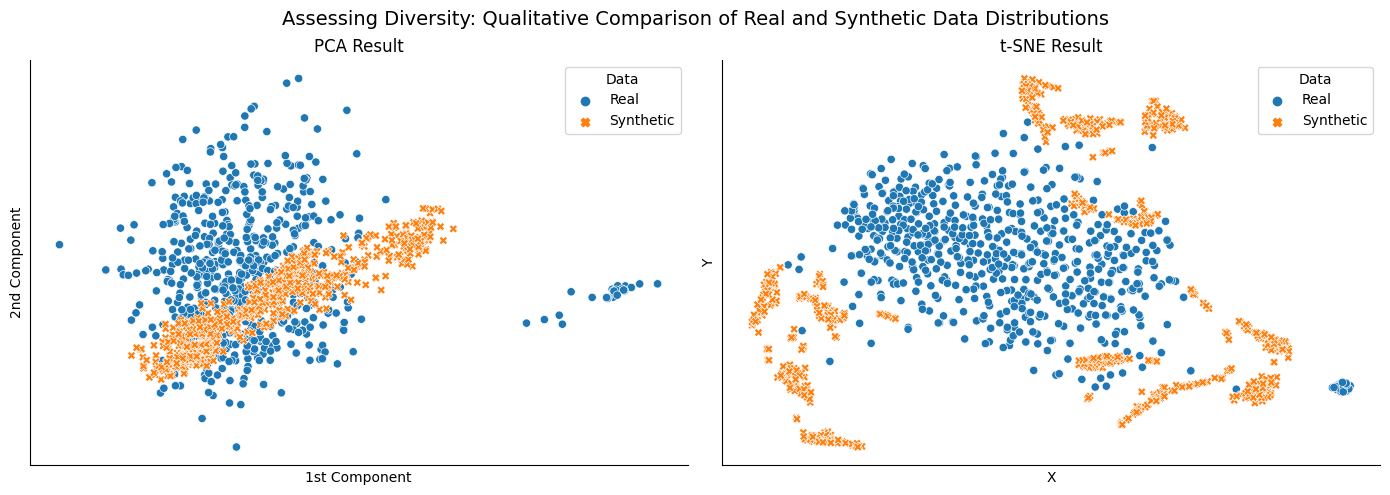

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

sns.scatterplot(x='1st Component', y='2nd Component', data=pca_result,
                hue='Data', style='Data', ax=axes[0])
sns.despine()
axes[0].set_title('PCA Result')


sns.scatterplot(x='X', y='Y',
                data=tsne_result,
                hue='Data',
                style='Data',
                ax=axes[1])
sns.despine()
for i in [0, 1]:
    axes[i].set_xticks([])
    axes[i].set_yticks([])

axes[1].set_title('t-SNE Result')
fig.suptitle('Assessing Diversity: Qualitative Comparison of Real and Synthetic Data Distributions',
             fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=.88);

In [ ]:
import numpy as np

from time_gan_tensorflow.model import TimeGAN
from time_gan_tensorflow.plots import plot

model = TimeGAN(
    x=np.array(agg_alibaba.iloc[:1046]),
    timesteps=12,
    hidden_dim=64,
    num_layers=3,
    lambda_param=0.1,
    eta_param=10,
    learning_rate=0.01,
    batch_size=16
)

model.fit(
    epochs=500,
    verbose=True
)

# Reconstruct the test data
x_hat = model.reconstruct(x=np.array(test))

# Generate the synthetic data
x_sim = model.simulate(samples=len(np.array(test)))

# Plot the actual, reconstructed and synthetic data
fig = plot(actual=np.array(test), reconstructed=x_hat, synthetic=x_sim)

ValueError: ignored

In [ ]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices(train)


In [ ]:
np.array(test)

array([[37.62000008, 34.85999985, 34.23999901, ..., 29.33999939,
        33.93999977, 39.1       ],
       [37.34000015, 30.82000008, 17.54000015, ..., 15.14000015,
        25.        , 30.35999985],
       [22.56000023, 23.44000015, 17.87999992, ..., 30.33999977,
        37.17999954, 29.2       ],
       ...,
       [40.86000061, 13.65999985, 36.1       , ..., 33.56000023,
        43.29999924, 45.77999992],
       [42.35999985, 32.67999954, 33.19999962, ..., 37.15999985,
        31.80000038, 32.04000053],
       [34.45999985, 28.67999992, 34.70000076, ..., 13.41999989,
        48.15999985, 38.41999969]])

In [ ]:
x_hat = model.reconstruct(x=np.array(test))

# Generate the synthetic data
x_sim = model.simulate(samples=len(np.array(test)))

# Plot the actual, reconstructed and synthetic data
fig = plot(actual=np.array(test), reconstructed=x_hat, synthetic=x_sim)

/content/time-gan-tensorflow/time_gan_tensorflow/utils.py:7: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



ValueError: ignored

In [ ]:
np.save( '/content/drive/My Drive/Colab Notebooks/t_gan_test_alibaba_2017.npy', test)
np.save('/content/drive/My Drive/Colab Notebooks/x_hat_alibaba_2017.npy', x_hat )
np.save( '/content/drive/My Drive/Colab Notebooks/x_sim_alibababa_2017.npy', x_sim)

In [ ]:
test = time_series_to_sequences(time_series=test, timesteps=4)

In [ ]:
! pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
fig = plot(actual=test, reconstructed=x_hat, synthetic=x_sim)
# fig.write_image('results.png', scale=4, height=900, width=700)
# plt.plot(x_sim[:,2])
fig.show()

In [ ]:
np.shape(x_sim)

(1728, 3)

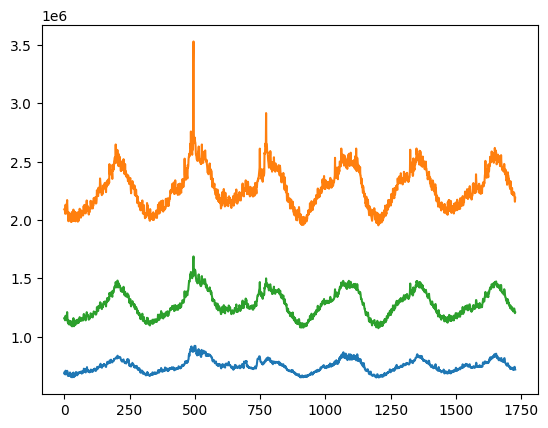

In [ ]:
plt.plot(test)

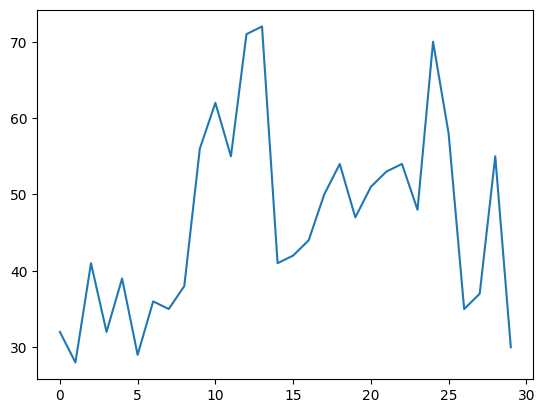

In [ ]:
plt.plot(test[100])

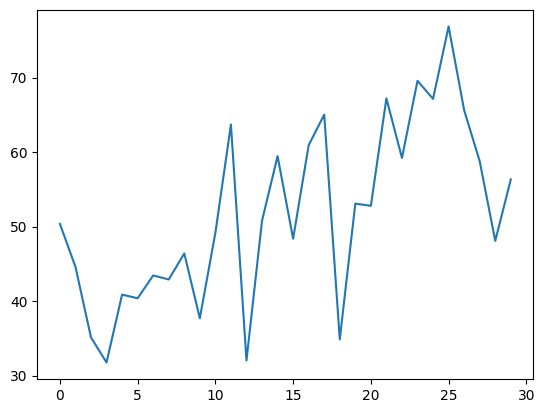

In [ ]:
plt.plot(x_sim[100])

### GAN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LeakyReLU, Dropout, Flatten, Dense, Reshape, Conv1DTranspose
from tensorflow.keras.models import Sequential

# Assuming your dataset is loaded as a NumPy array
# dataset shape is (1008, 20)
# data = np.random.rand(1008, 20)  # Replace this with actual data loading

# Normalize the data
# data = (data - np.min(data)) / (np.max(data) - np.min(data))
# data = data.values

# Reshape data for the discriminator
# data = data.reshape((data.shape[0], data.shape[1], 1))

def build_generator(latent_dim):
    model = Sequential()

    model.add(Dense(64, activation="relu", input_dim=latent_dim))
    model.add(Reshape((64, 1)))

    model.add(Conv1DTranspose(64, kernel_size=4, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv1DTranspose(32, kernel_size=4, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv1DTranspose(1, kernel_size=4, strides=2, padding="same"))
    model.add(Flatten())
    model.add(Dense(20, activation="tanh"))
    model.add(Reshape((20, 1)))

    return model

# latent_dim = 100
# generator = build_generator(latent_dim)


latent_dim = 100
generator = build_generator(latent_dim)

def build_discriminator(input_shape):
    model = Sequential()

    model.add(Conv1D(32, kernel_size=3, strides=2, input_shape=input_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))

    model.add(Conv1D(64, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))

    model.add(Conv1D(128, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))

    return model

input_shape = (20, 1)
discriminator = build_discriminator(input_shape)
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)
    return model

gan = build_gan(generator, discriminator)
gan.compile(loss="binary_crossentropy", optimizer="adam")

import matplotlib.pyplot as plt

def train_gan(gan, generator, discriminator, data, latent_dim, epochs=3000, batch_size=64):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_ts = data[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_ts = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_ts, valid)
        d_loss_fake = discriminator.train_on_batch(gen_ts, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, valid)

        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

train_gan(gan, generator, discriminator, data, latent_dim, epochs=3000, batch_size=64)


2/2 [==============================] - 0s 5ms/step
0 [D loss: 0.6963808834552765, acc.: 14.0625] [G loss: 0.6896357536315918]
2/2 [==============================] - 0s 4ms/step
1000 [D loss: 0.6934136152267456, acc.: 60.15625] [G loss: 0.7086382508277893]
2/2 [==============================] - 0s 5ms/step
2000 [D loss: 0.6070049405097961, acc.: 71.875] [G loss: 0.7600137591362]
2/2 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 33ms/step
[[[0.04273616]
  [0.04830213]
  [0.02453066]
  [0.05020262]
  [0.05235708]
  [0.06569494]
  [0.06460981]
  [0.08593497]
  [0.07033423]
  [0.07794582]
  [0.08212544]
  [0.06363656]
  [0.06227117]
  [0.06082467]
  [0.06807027]
  [0.09341101]
  [0.05273512]
  [0.08056311]
  [0.04565663]
  [0.04927352]]

 [[0.04275272]
  [0.04831308]
  [0.02463289]
  [0.050226  ]
  [0.05229842]
  [0.06562157]
  [0.06464376]
  [0.08576743]
  [0.07034861]
  [0.07798361]
  [0.08204503]
  [0.06354963]
  [0.0622303 ]
  [0.06075485]
  [0.06807227]
  [0.09339507]
  [0.05280822]
  [0.08060619]
  [0.04556626]
  [0.04922386]]

 [[0.04274292]
  [0.04826728]
  [0.02459073]
  [0.05019799]
  [0.05227031]
  [0.06563624]
  [0.06458909]
  [0.08588398]
  [0.07032303]
  [0.07797129]
  [0.08207295]
  [0.06360971]
  [0.06227805]
  [0.0608057 ]
  [0.06804449]
  [0.09340067]
  [0.05277712]
  [0.08061248]
  [0.04559863]
  [0.04927683]]

 [[0.04272957]
  [0.04830391]
  [0.0245446

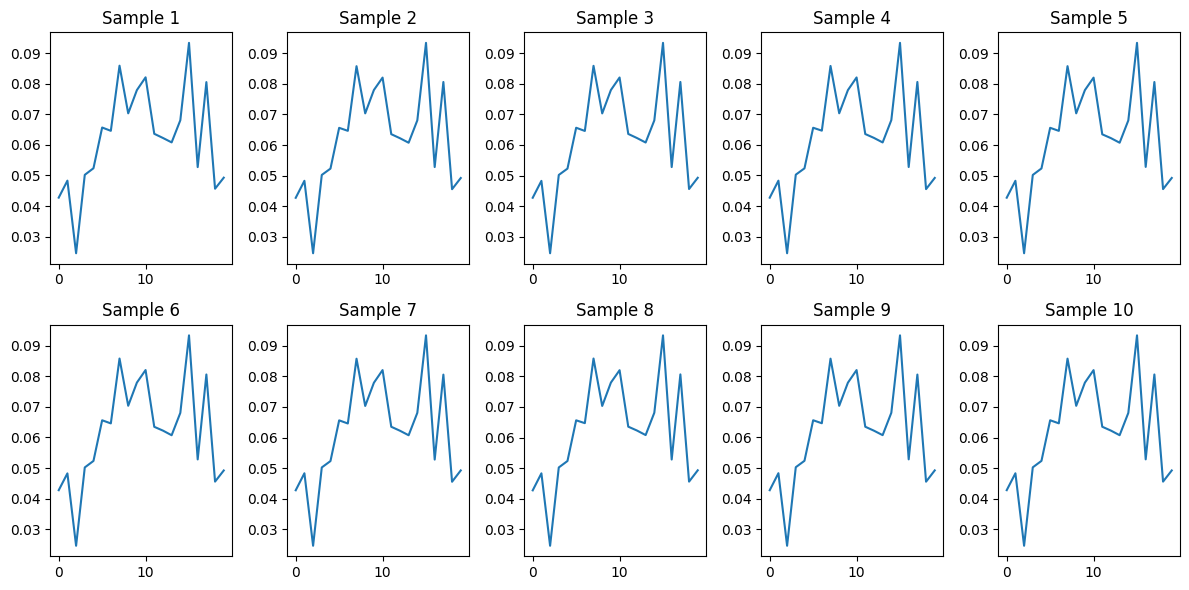

In [ ]:
import matplotlib.pyplot as plt

# Function to generate and plot time series
def generate_and_plot(generator, latent_dim, n_samples=10):
    # Generate random noise
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    # Generate time series data using the generator
    gen_ts = generator.predict(noise)
    print(gen_ts)

    # Plot the generated time series
    plt.figure(figsize=(12, 6))
    for i in range(n_samples):
        plt.subplot(2, 5, i+1)
        plt.plot(gen_ts[i].reshape(-1))
        plt.title(f"Sample {i+1}")
    plt.tight_layout()
    plt.show()

# Generate and plot 10 samples
generate_and_plot(generator, latent_dim, n_samples=10)


In [ ]:
gen_ts[1]

NameError: name 'gen_ts' is not defined

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LeakyReLU, Dropout, Flatten, Dense, Reshape, Conv1DTranspose
from tensorflow.keras.models import Sequential

# Assuming your dataset is loaded as a NumPy array
# dataset shape is (1008, 20)
# data = np.random.rand(1008, 20)  # Replace this with actual data loading

# Normalize the data
# data = (data - np.min(data)) / (np.max(data) - np.min(data))
# data = data.values

# Reshape data for the discriminator
# data = data.reshape((data.shape[0], data.shape[1], 1))

def build_generator(latent_dim):
    model = Sequential()

    model.add(Dense(128 * 5, activation="relu", input_dim=latent_dim))
    model.add(Reshape((5, 128)))

    model.add(Conv1DTranspose(128, kernel_size=4, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv1DTranspose(64, kernel_size=4, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv1D(1, kernel_size=7, activation="tanh", padding="same"))

    return model

latent_dim = 100
generator = build_generator(latent_dim)


# latent_dim = 100
# generator = build_generator(latent_dim)


# latent_dim = 100
# generator = build_generator(latent_dim)

def build_discriminator(input_shape):
    model = Sequential()

    model.add(Conv1D(64, kernel_size=3, strides=2, input_shape=input_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))

    model.add(Conv1D(128, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))

    model.add(Conv1D(256, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))

    return model

input_shape = (20, 1)
discriminator = build_discriminator(input_shape)
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# input_shape = (20, 1)
# discriminator = build_discriminator(input_shape)
# discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)
    return model

gan = build_gan(generator, discriminator)
gan.compile(loss="binary_crossentropy", optimizer="adam")

tf.keras.utils.plot_model(
    gan,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
)

import matplotlib.pyplot as plt

def train_gan(gan, generator, discriminator, data, latent_dim, epochs=1000, batch_size=64):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_ts = data[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_ts = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_ts, valid)
        d_loss_fake = discriminator.train_on_batch(gen_ts, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, valid)

        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")
            # Optionally, you can save the model or generate samples here

train_gan(gan, generator, discriminator, data, latent_dim, epochs=1000, batch_size=64)



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
tf.keras.utils.plot_model(
    gan,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
!pip install pydot

2/2 [==============================] - 0s 4ms/step


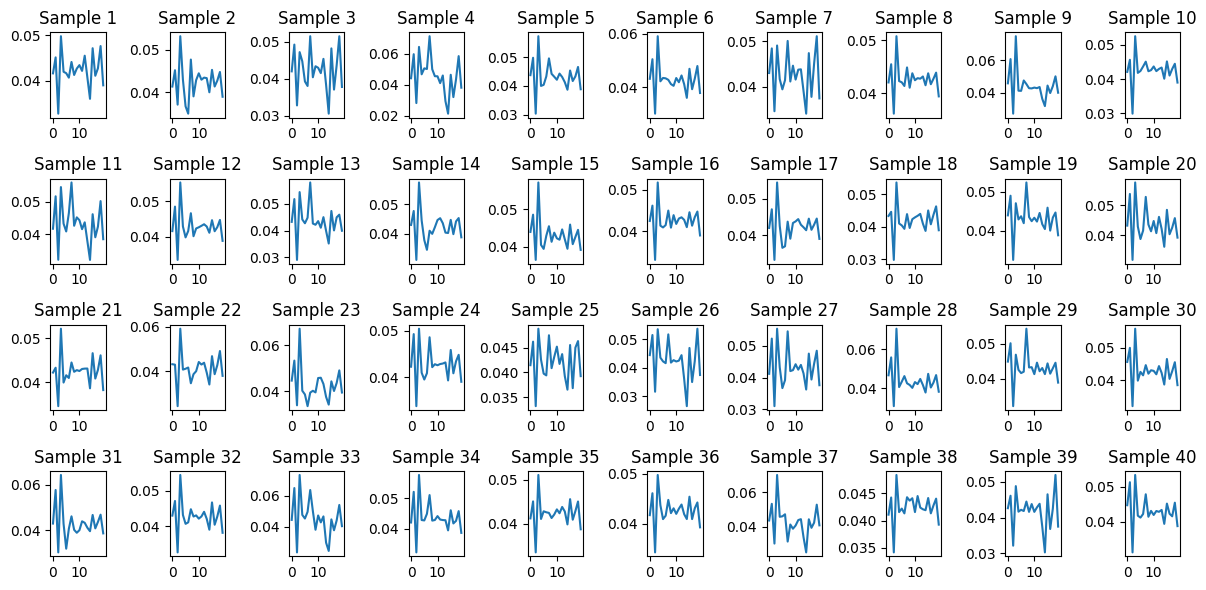

In [ ]:
def generate_and_plot(generator, latent_dim, n_samples=40):
    # Generate random noise
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    # Generate time series data using the generator
    gen_ts = generator.predict(noise)

    # Plot the generated time series
    plt.figure(figsize=(12, 6))
    for i in range(n_samples):
        plt.subplot(4, 10, i+1)
        plt.plot(gen_ts[i].reshape(-1))
        plt.title(f"Sample {i+1}")
    plt.tight_layout()
    plt.show()
    return(gen_ts)

# Generate and plot 10 samples
x_sim = generate_and_plot(generator, latent_dim, n_samples=40)


In [ ]:
pd.DataFrame(x_sim).to_csv('/content/drive/My Drive/Colab Notebooks/Azure_function_invocation/x_sim_gansimple.csv')

In [ ]:
x_sim = x_sim.reshape([x_sim.shape[0], -1])

In [ ]:

np.shape(x_sim)

(40, 20)